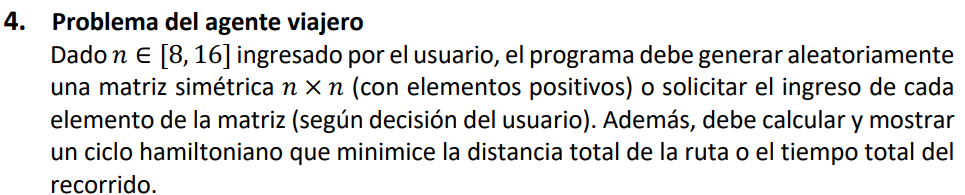

In [212]:
import numpy as np
import graphviz as gv
import matplotlib.pyplot as plt
from collections import defaultdict
import networkx as nx

In [213]:
def generarArbol(mtx):
    num_nodes = len(mtx)  # Get the number of nodes from the matrix size
    visitado = []  # List to track the visited nodes
    vertices = []  # To store the MST edges
    root = 0  # Starting node
    visitado.append(root)
    peso = 0

    # Repeat until all nodes are in the visited list (MST)
    while len(visitado) < num_nodes:
        menor = 1000  # Start with an infinite value for the smallest edge
        u, v = -1, -1  # Variables to store the selected nodes of the smallest edge

        # Loop through all visited nodes to find the smallest edge to an unvisited node
        for i in visitado:
            for j in range(num_nodes):
                if j not in visitado and mtx[i][j] > 0 and mtx[i][j] < menor:
                    menor = mtx[i][j]
                    
                    nIni, nFin = i, j
        peso += menor

        # Add the found smallest edge to the MST and mark the node as visited
        if nFin != -1:
            vertices.append((nIni, nFin, menor))  # Append the edge (u, v) with weight 'menor'
            visitado.append(nFin)  # Add the new node to the visited list

    return vertices,peso



In [214]:
def mtxAdyacencia(mst,n):
    listaAd = defaultdict(list)
    
    # Loop over all edges and add to adjacency list
    for nIni, nFin, weight in mst:
        listaAd[nIni].append(nFin)
        listaAd[nFin].append(nIni)  # Since it's an undirected graph, add both directions
    
    return listaAd

def preOrden(listaAd, node, visited):
    visited.add(node)
    preOrd=[]
    preOrd.append(node)
    #print(node, end=" ")  # Visit the node
    
    # Recur for all the vertices adjacent to this vertex
    for neighbor in listaAd[node]:
        if neighbor not in visited:
            preOrd.extend(preOrden(listaAd, neighbor, visited))
    return preOrd


In [215]:
while True:
    nstr = input("Ingrese un numero entre 8 y 16: ")
    n = int(nstr)
    if n>=8 and n<=16:
        break
    else:
        print("Revise el numero ingresado")

In [216]:
def crearMtx(n):
    A = np.random.randint(low=0,high =20,size=(n,n))
    A_T=A.transpose()
    B = ( A + A_T)/2
    #print(A)
    B = B.astype('int')
    np.fill_diagonal(B,0)
    return B

def mostrarMtx(B,n):
    data=B
    # Step 2: Create a figure and axis
    fig, ax = plt.subplots()

    # Step 3: Hide the axes
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
    ax.set_frame_on(False)  # Remove the border

    # Step 4: Create the table from the NumPy array
    table = ax.table(cellText=data, loc='center', cellLoc='center')
    if(n>12):
    # Step 5: Adjust the layout to fit the table
        table.scale(1.5, 3)  # Adjust scaling for better fit (optional)
        table.auto_set_font_size(False)
        table.set_fontsize(12)
    if(n<=12):
        table.scale(1, 3)  # Adjust scaling for better fit (optional)
        table.auto_set_font_size(False)
        table.set_fontsize(12)

    # Show the table
    plt.show()


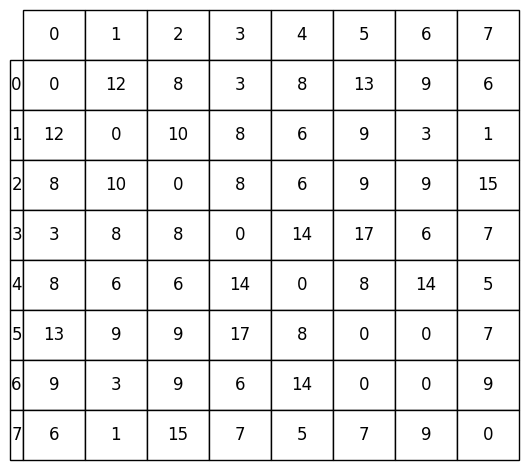

In [227]:

def mostrarMtx(B, n):
    # Ensure B is a 2D array
    data =B
    
    # Step 1: Create row and column labels (axis values)
    row_labels = [f"{i}" for i in range(data.shape[0])]
    col_labels = [f"{j}" for j in range(data.shape[1])]

    # Step 2: Create a figure and axis
    fig, ax = plt.subplots()

    # Step 3: Hide the axes
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
    ax.set_frame_on(False)  # Remove the border

    # Step 4: Create the table from the NumPy array with row and column labels
    table = ax.table(cellText=data, rowLabels=row_labels, colLabels=col_labels, loc='center', cellLoc='center')

    # Step 5: Adjust the layout to fit the table
    if n > 12:
        table.scale(1.5, 3)  # Adjust scaling for larger matrices
        table.auto_set_font_size(False)
        table.set_fontsize(12)
    else:
        table.scale(1, 3)  # Adjust scaling for smaller matrices
        table.auto_set_font_size(False)
        table.set_fontsize(12)

    # Show the table
    plt.show()

# Example usage:

mostrarMtx(B, n)


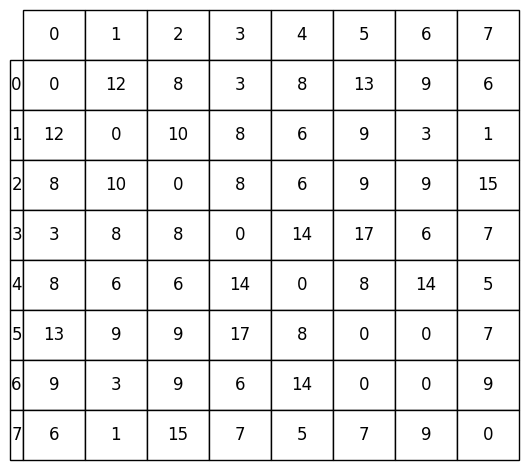

[(0, 3, 3), (0, 7, 6), (7, 1, 1), (1, 6, 3), (7, 4, 5), (4, 2, 6), (7, 5, 7)]
31
[0, 3, 7, 1, 6, 4, 2, 5, 0] 
 44


In [225]:
B=crearMtx(n)
mostrarMtx(B,n)

mst,peso = generarArbol(B)
print(mst)
listaAd = mtxAdyacencia(mst,n)
visited = set()  # To keep track of visited nodes
preO = preOrden(listaAd, 0, visited)
preO.append(preO[0])
print(peso)
peso += B[preO[-2]][preO[-1]]
print(preO,"\n",peso)

In [228]:
def mostrargrafo(B,mst,preO):
    # Step 1: Define a symmetric weight matrix (example with 4 nodes)
    weight_matrix = B

    # Step 2: Create a graph from the weight matrix
    G = nx.Graph()
    bordes=mst

    hamiltonian_path=preO
    # Add edges with weights based on the matrix
    n = weight_matrix.shape[0]  # Number of nodes
    for i in range(n):
        for j in range(i+1, n):  # Only look at upper triangular matrix (since it's symmetric)
            if weight_matrix[i, j] != 0:  # Add an edge only if the weight is non-zero
                G.add_edge(i, j, weight=weight_matrix[i, j])
    G.add_weighted_edges_from(bordes)
    # Step 3: Draw the graph
    pos = nx.spring_layout(G)  # Use spring layout for node positions
    nx.draw(G, pos, with_labels=True, node_color="lightblue", node_size=700, font_size=15)
    path_edges = list(zip(hamiltonian_path, hamiltonian_path[1:]))
    nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color="red", width=2)
    nx.draw_networkx_nodes(G, pos, nodelist=hamiltonian_path, node_color="violet", node_size=700)

    # Step 4: Draw edge labels (weights)
    edge_labels = {(i, j): f'{d["weight"]}' for i, j, d in G.edges(data=True)}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)

    # Show the plot
    plt.show()
    

In [230]:
def grafoLimpio(B,mst,preO):
    weight_matrix = B

    # Step 2: Create a graph from the weight matrix
    G = nx.Graph()
    bordes=mst

    hamiltonian_path=preO
    # Add edges with weights based on the matrix
    n = weight_matrix.shape[0]  # Number of nodes
    for i in range(n):
        for j in range(i+1, n):  # Only look at upper triangular matrix (since it's symmetric)
            if weight_matrix[i, j] != 0:  # Add an edge only if the weight is non-zero
                G.add_edge(i, j, weight=weight_matrix[i, j])
    G.add_weighted_edges_from(bordes)
    # Step 3: Draw the graph
    pos = nx.spring_layout(G)  # Use spring layout for node positions
    path_edges = list(zip(hamiltonian_path, hamiltonian_path[1:]))
    edges_to_remove = [edge for edge in G.edges() if edge not in path_edges and (edge[1], edge[0]) not in path_edges]
    G.remove_edges_from(edges_to_remove)
    nx.draw(G, pos, with_labels=True, node_color="lightblue", node_size=700, font_size=15)
    nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color="red", width=2)
    nx.draw_networkx_nodes(G, pos,nodelist=hamiltonian_path, node_color="violet", node_size=700)
    edge_labels = {(i, j): f'{d["weight"]}' for i, j, d in G.edges(data=True)}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)


    plt.show()

In [221]:
def crearGrafo(n,preO): 
    nd = gv.Digraph(node_attr={'shape': 'circle'},format='png')
    for i in range(n):
        x=round(2.5*i)
        y=i+1
        nd.node(chr(65+i),label=chr(65+i), pos=f'{x},{y}!')
    for i in range(n):
        nd.edge(chr(65+preO[i]),chr(65+preO[i+1]))
    #nd.attr(nodesep='3',ranksep='')    
    #display(nd)
crearGrafo(n,preO)

In [222]:
g = gv.Digraph(node_attr={'shape': 'circle'},format='png')
for i in range(n):
    for j in range(n):
        if B[i,j]!=0:
            g.edge(chr(65+i),chr(65+j),label=str(B[i,j]))
        
#display(g)